<a href="https://colab.research.google.com/github/apekshyasharma/BloomTaxonomyClassifier/blob/main/BloomClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bloom's Taxonomy Question Classification using NLP and Machine Learning**

This notebook implements a supervised text classification system to automatically
classify educational questions into Bloom's Taxonomy cognitive levels.

## **Step 1: Import Required Libraries**

We import essential libraries for data processing, NLP, machine learning, and evaluation.

In [1]:
# Libraries for Data handling and manipulation
import pandas as pd
import numpy as np

In [2]:
# Importing NLP libraries for text processing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [3]:
# Importing important machine learning model used as a baseline model
from sklearn.linear_model import LogisticRegression

In [4]:
# Importing important Model evaluation metrics for Classification task
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
# Importing visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Importing warning system libraries to avoid warnings while running the cells
import warnings
warnings.filterwarnings('ignore')

## **Step 2: Load and Explore the Dataset**

We load the Bloom's Taxonomy dataset and perform initial exploratory data analysis procedures.

In [7]:
# To load the dataset, I'll be mounting my google drive, since I'm using Google Colab.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
dataset_path = '/content/drive/MyDrive/datasets/blooms_taxonomy_datasets.csv' # import dataset from google drive path
df = pd.read_csv(dataset_path) # change into Pandas DataFrame for structured tabular form of data

In [9]:
#  Initializing the Exploratory Data Analysis (EDA) Part. Displaying basic information about the dataset
df.head() # gives first five data of the dataset.

,Questions,Category
0,About what proportion of the population of the...,BT1
1,Correctly label the brain lobes indicated on t...,BT1
2,Define compound interest.,BT1
3,Define four types of traceability,BT1
4,Define mercantilism.,BT1


In [10]:
# Show the number of rows and columns in the dataset to understand how much data is available and how it is structured
print("Dataset Shape:", df.shape)  # output: 8767 rows and 2 columns

Dataset Shape: (8767, 2)


In [11]:
# Display detailed information about the dataset, including column names, data types, and non-null values
print("\nDataset Info:")
print(df.info())
'''The output shows that the dataset contains 8,767 rows and 2 text-based columns (Questions and Category), with no missing values,
 indicating clean and complete data suitable for analysis'''



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8767 entries, 0 to 8766
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Questions  8767 non-null   object
 1   Category   8767 non-null   object
dtypes: object(2)
memory usage: 137.1+ KB
None


'The output shows that the dataset contains 8,767 rows and 2 text-based columns (Questions and Category), with no missing values,\n indicating clean and complete data suitable for analysis'

In [12]:
# Check and display the number of missing values in each column to confirm the completeness of the dataset
print("\nMissing Values:")
print(df.isnull().sum())
"""The output confirms that there are no missing values in either the Questions or Category columns,
 indicating that the dataset is complete and does not require missing value handling.
"""


Missing Values:
Questions    0
Category     0
dtype: int64


'The output confirms that there are no missing values in either the Questions or Category columns,\n indicating that the dataset is complete and does not require missing value handling.\n'

**Alternatively, If there were any missing values in our dataset,these missing values could be handled by either removing incomplete rows or filling them using appropriate techniques**

1. df.dropna(inplace=True)        
  - Remove rows with missing values


2. df.fillna("Unknown", inplace=True)
 - Replace missing values with a placeholder


## **Step 3: Analyze Class Distribution**

We examine the distribution of Bloom's Taxonomy levels in the dataset.

In [13]:
# Show the total number of Taxonomy Levels in the given dataset
print("\nBloom's Taxonomy Levels in the dataset:")
print(sorted(df['Category'].unique()))


Bloom's Taxonomy Levels in the dataset:
['BT1', 'BT2', 'BT3', 'BT4', 'BT5', 'BT6']


In [14]:
# Count the number of samples in each category
class_distribution = df['Category'].value_counts()
print("Class Distribution:")
print(class_distribution)
print("\nClass Distribution Percentage:")
print(df['Category'].value_counts(normalize=True) * 100)

""" The output shows that the dataset is not evenly balanced across categories,
    with BT1 having the highest number of samples and BT5 and BT6 having the lowest,
    indicating a moderate class imbalance that may affect model training
"""

Class Distribution:
Category
BT1    2582
BT2    1801
BT3    1508
BT4    1293
BT6     800
BT5     783
Name: count, dtype: int64

Class Distribution Percentage:
Category
BT1    29.451352
BT2    20.542945
BT3    17.200867
BT4    14.748489
BT6     9.125128
BT5     8.931219
Name: proportion, dtype: float64


' The output shows that the dataset is not evenly balanced across categories,\n    with BT1 having the highest number of samples and BT5 and BT6 having the lowest,\n    indicating a moderate class imbalance that may affect model training\n'

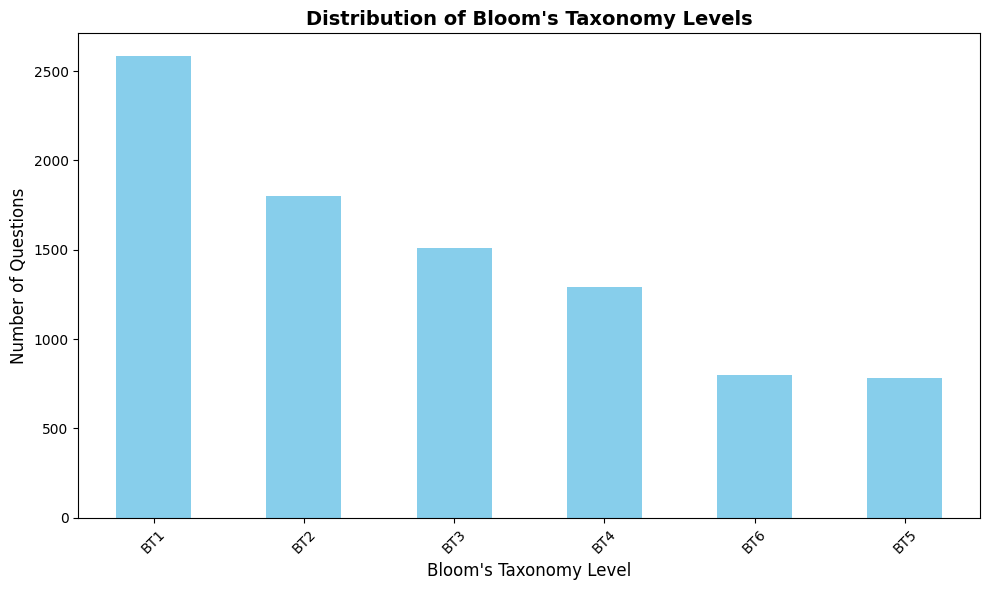

In [15]:
# Visualize the class distribution
plt.figure(figsize=(10, 6))
class_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Bloom\'s Taxonomy Levels', fontsize=14, fontweight='bold')
plt.xlabel('Bloom\'s Taxonomy Level', fontsize=12)
plt.ylabel('Number of Questions', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Step 3.1: Text Preprocessing Setup**

We download and configure NLTK resources for advanced text preprocessing including tokenization,
stopwords removal, and lemmatization.

In [16]:
# Import NLTK library for advanced text processing
import nltk

In [17]:
try:
    # Download the 'punkt' tokenizer used for splitting text into words or sentences
    nltk.download('punkt', quiet=True)
    print("punkt tokenizer downloaded")

    # Download the list of stopwords (common words like 'the', 'is') to remove during text preprocessing
    nltk.download('stopwords', quiet=True)
    print("stopwords downloaded")

    # Download WordNet data required for lemmatization (reducing words to their base form)
    nltk.download('wordnet', quiet=True)
    print("WordNet lemmatizer data downloaded")

    # Download the averaged_perceptron_tagger for part-of-speech (POS) tagging, useful for advanced NLP tasks
    nltk.download('averaged_perceptron_tagger', quiet=True)
    print("POS tagger downloaded")

    # Download the updated tokenization tables
    nltk.download('punkt_tab')
    print("punkt_tab downloaded")

    # Confirmation message indicating all necessary NLTK resources were downloaded successfully
    print("\n" + "="*70)
    print("All NLTK resources downloaded successfully!")
    print("="*70)

except Exception as e:
    # Handle any download errors and continue execution with basic text preprocessing
    print(f"Warning: Could not download some NLTK resources: {e}")
    print("The notebook will continue with basic text preprocessing.")

punkt tokenizer downloaded
stopwords downloaded
WordNet lemmatizer data downloaded
POS tagger downloaded


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


punkt_tab downloaded

All NLTK resources downloaded successfully!


In [18]:
# Import the text processing tools we'll need:
from nltk.tokenize import word_tokenize  # breaks sentences into array of separate words
from nltk.corpus import stopwords  # lets us ignore common words involved
from nltk.stem import WordNetLemmatizer  # finds the root word form of words
import string  # gives us all punctuation characters

In [19]:
# Set up our tool to find root forms of words
lemmatizer = WordNetLemmatizer()

# Grab the list of common English words we'll want to filter out
english_stopwords = set(stopwords.words('english'))

In [20]:
# Display a summary of our toolkit so we know everything's loaded properly
print("\nText Preprocessing Resources Ready:")
print(f"   - Tokenizer: word_tokenize")
print(f"   - Stopwords: {len(english_stopwords)} common English words")
print(f"   - Lemmatizer: WordNetLemmatizer")
print(f"   - Punctuation: {len(string.punctuation)} characters to remove")


Text Preprocessing Resources Ready:
   - Tokenizer: word_tokenize
   - Stopwords: 198 common English words
   - Lemmatizer: WordNetLemmatizer
   - Punctuation: 32 characters to remove


## **Step 4: Define Text Preprocessing Function**

We create a reusable text preprocessing function that prepares questions for feature extraction
and model training.

In [21]:
# Define a comprehensive text preprocessing function
# Steps:
# - Convert text to lowercase
# - Remove punctuation and numbers
# - Tokenize text into words
# - Remove English stopwords
# - Apply lemmatization
# This function prepares text for feature extraction

def preprocess_text(text):
    """
    Comprehensive text preprocessing function for Bloom's Taxonomy questions

    Parameters:
    -----------
    text : str
        Raw question text to preprocess

    Returns:
    --------
    str
        Cleaned and processed text ready for feature extraction

    Preprocessing steps:
    1. Convert to lowercase
    2. Remove punctuation
    3. Remove numbers
    4. Tokenize into words
    5. Remove English stopwords
    6. Apply lemmatization
    """

    # Step 1: Convert to lowercase
    text = str(text).lower()

    # Step 2 & 3: Remove punctuation and numbers
    text = text.translate(str.maketrans('', '', string.punctuation + string.digits))

    # Step 4: Tokenize into words
    tokens = word_tokenize(text)

    # Step 5 & 6: Remove stopwords and lemmatize
    processed_tokens = [
        lemmatizer.lemmatize(token)
        for token in tokens
        if token not in english_stopwords and len(token) > 1
    ]

    # Join tokens back into a string
    processed_text = ' '.join(processed_tokens)

    return processed_text

print("Text preprocessing function defined successfully!")

Text preprocessing function defined successfully!


## **Step 5: Apply Preprocessing to All Questions**

We apply the preprocessing function to every question in the dataset and store the cleaned text in a new column.

In [22]:
# Apply the preprocessing function to all questions in the dataset
# Store the cleaned text in a new column

print("Starting to clean all questions...")
print("="*70)

# Use the preprocess_text function on each question
# .apply() runs the function on every row in the Questions column
df['Processed_Questions'] = df['Questions'].apply(preprocess_text)

print(f"Successfully cleaned {len(df)} questions!")

# Check if any questions failed to process
missing_count = df['Processed_Questions'].isnull().sum()
print(f"Questions with problems: {missing_count}")

# Show statistics about the cleaning
print("\n" + "="*70)
print("Preprocessing Results:")
print("="*70)

# Count how many words are in each original and cleaned question
df['Original_Word_Count'] = df['Questions'].str.split().str.len()
df['Cleaned_Word_Count'] = df['Processed_Questions'].str.split().str.len()

# Calculate how much text was removed
reduction = ((df['Original_Word_Count'] - df['Cleaned_Word_Count']) / df['Original_Word_Count'] * 100).mean()

print(f"Average words before cleaning: {df['Original_Word_Count'].mean():.1f}")
print(f"Average words after cleaning:  {df['Cleaned_Word_Count'].mean():.1f}")
print(f"Average text reduction:         {reduction:.1f}%")

# Show some examples of the cleaning
print("\n" + "="*70)
print("Example 1: BT1 Question (Remember/Recall)")
print("="*70)

# Find an example from category BT1
bt1_example = df[df['Category'] == 'BT1'].iloc[0]
print(f"Original: {bt1_example['Questions']}")
print(f"Cleaned:  {bt1_example['Processed_Questions']}")

print("\n" + "="*70)
print("Example 2: BT2 Question (Understand)")
print("="*70)

# Find an example from category BT2
bt2_example = df[df['Category'] == 'BT2'].iloc[0]
print(f"Original: {bt2_example['Questions']}")
print(f"Cleaned:  {bt2_example['Processed_Questions']}")

# Show the updated dataset
print("\n" + "="*70)
print("Dataset After Preprocessing:")
print("="*70)
print(df[['Questions', 'Processed_Questions', 'Category']].head(8))

# Summary
print("\n" + "="*70)
print("Preprocessing Complete!")
print("="*70)
print(f"Dataset shape: {df.shape}")
print(f"New columns added: Processed_Questions, Original_Word_Count, Cleaned_Word_Count")
print(f"Ready for feature extraction and model training!")

Starting to clean all questions...
Successfully cleaned 8767 questions!
Questions with problems: 0

Preprocessing Results:
Average words before cleaning: 13.1
Average words after cleaning:  8.3
Average text reduction:         36.5%

Example 1: BT1 Question (Remember/Recall)
Original: About what proportion of the population of the US is living on farms?
Cleaned:  proportion population u living farm

Example 2: BT2 Question (Understand)
Original: Compare Calliope with Howie. Use the word bank.
Cleaned:  compare calliope howie use word bank

Dataset After Preprocessing:
                                           Questions  \
0  About what proportion of the population of the...   
1  Correctly label the brain lobes indicated on t...   
2                          Define compound interest.   
3                  Define four types of traceability   
4                               Define mercantilism.   
5      Define stream bank, floodplain and substrate.   
6           Define the meaning of 

In [23]:
df.head() #Display top 5 data from updated DataFrame

,Questions,Category,Processed_Questions,Original_Word_Count,Cleaned_Word_Count
0,About what proportion of the population of the...,BT1,proportion population u living farm,13,5
1,Correctly label the brain lobes indicated on t...,BT1,correctly label brain lobe indicated diagram,10,6
2,Define compound interest.,BT1,define compound interest,3,3
3,Define four types of traceability,BT1,define four type traceability,5,4
4,Define mercantilism.,BT1,define mercantilism,2,2


## **Step 6: Feature Extraction using TF-IDF**

We convert cleaned text into numerical features using TF-IDF (Term Frequency-Inverse Document Frequency).
TF-IDF helps capture important words while reducing the effect of common terms.

In [24]:
print("Converting text to numerical features...")
print("="*70)

"""Set up the TF-IDF converter
- max_features=100 means "just give me the 100 most meaningful words"
- This keeps things simple and helps our model focus on what matters
- max_features=5000 captures more signal; ngram_range=(1, 2) adds bigrams """
tfidf_vectorizer = TfidfVectorizer (max_features=5000, ngram_range=(1, 2))  # changed from max_features=100 since the accuracy was 50% only initially

# Transform all our cleaned questions into numerical scores
# Each question becomes a row of 100 numbers representing word importance
X_tfidf = tfidf_vectorizer.fit_transform(df['Processed_Questions'])

print(f"TF-IDF vectorization complete!")
print(f"  - Number of questions: {X_tfidf.shape[0]}")
print(f"  - Number of features (words): {X_tfidf.shape[1]}")
print(f"  - Total values: {X_tfidf.nnz} (non-zero entries)")

Converting text to numerical features...
TF-IDF vectorization complete!
  - Number of questions: 8767
  - Number of features (words): 5000
  - Total values: 79068 (non-zero entries)


### **Step 6.1: Display Feature Vocabulary** **bold text**
Show the top words selected by TF-IDF as model features.

In [25]:
# Let's see which words the TF-IDF picked as most important
print("\n" + "="*70)
print("Top Words Used as Features:")
print("="*70)

# Grab the list of words that made it into our top 100
feature_names = tfidf_vectorizer.get_feature_names_out()
print(f"Total unique words selected: {len(feature_names)}")

# Show the first 20 to get a sense of what we're working with
print(f"\nFirst 20 words in the feature list:")
for i, word in enumerate(feature_names[:20], 1):
    print(f"  {i}. {word}")


Top Words Used as Features:
Total unique words selected: 5000

First 20 words in the feature list:
  1. ab
  2. abc
  3. abc shown
  4. abcd
  5. able
  6. absolute
  7. absolute advantage
  8. absorption
  9. abstract
  10. abstract data
  11. ac
  12. ac bridge
  13. academic
  14. acceleration
  15. acceptance
  16. access
  17. access control
  18. access management
  19. access resource
  20. according


### **Step 6.2: Encode Target Variable**
Convert Bloom's Taxonomy categories into numerical labels.

In [26]:
# Now let's prepare our answer key - the Bloom's Taxonomy levels
# Machine learning models need numbers, not text labels like "BT1", "BT2"
# So we'll convert each category into a number
print("\n" + "="*70)
print("Preparing Target Variable (Bloom's Taxonomy Levels):")
print("="*70)

# Set up our label encoder - this will turn text categories into numbers
label_encoder = LabelEncoder()

# Convert all the categories (BT1, BT2, etc.) into numerical codes
y = label_encoder.fit_transform(df['Category'])

print(f"Target variable created!")
print(f"  - Number of samples: {len(y)}")
print(f"  - Number of classes: {len(label_encoder.classes_)}")
print(f"  - Class names: {label_encoder.classes_}")
print(f"  - Encoded values: {sorted(set(y))}")


Preparing Target Variable (Bloom's Taxonomy Levels):
Target variable created!
  - Number of samples: 8767
  - Number of classes: 6
  - Class names: ['BT1' 'BT2' 'BT3' 'BT4' 'BT5' 'BT6']
  - Encoded values: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]


### **Step 6.3: Label Mapping & Distribution**
View the encoding schema and check for class imbalance.

In [27]:
# Let's see exactly how each Bloom's level got converted to a number
# This also shows us how balanced our dataset is across categories
print("\n" + "="*70)
print("Category to Number Mapping:")
print("="*70)

for i, class_name in enumerate(label_encoder.classes_):
    # Count how many questions belong to this category
    count = sum(y == i)
    # Calculate what percentage of our total dataset this represents
    percentage = (count / len(y)) * 100
    print(f"  {class_name} → {i} ({count} questions, {percentage:.1f}%)")


Category to Number Mapping:
  BT1 → 0 (2582 questions, 29.5%)
  BT2 → 1 (1801 questions, 20.5%)
  BT3 → 2 (1508 questions, 17.2%)
  BT4 → 3 (1293 questions, 14.7%)
  BT5 → 4 (783 questions, 8.9%)
  BT6 → 5 (800 questions, 9.1%)


### **6.4: Feature Extraction Summary**

In [28]:
# Quick recap: here's what we've built for training our model
print("\n" + "="*70)
print("Feature Extraction Summary:")
print("="*70)
# X_tfidf = our questions converted to numbers (rows = questions, columns = word features)
print(f"Input shape (questions, features): {X_tfidf.shape}")
# y = the correct Bloom's level for each question
print(f"Output shape (samples, labels): {len(y)}")
# We used TF-IDF to pick the 100 most meaningful words
print(f"Vectorizer: TfidfVectorizer with max_features=100")
print(f"Ready for model training!")


Feature Extraction Summary:
Input shape (questions, features): (8767, 5000)
Output shape (samples, labels): 8767
Vectorizer: TfidfVectorizer with max_features=100
Ready for model training!


## **Step 7: Split the Data for Training and Testing**
We'll use 80% to teach the model and 20% to test what it learned.

In [29]:
# Split the dataset into training and testing sets
# Use 80% of the data for training and 20% for testing
# Set a random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42
)

print("Train-test split complete!")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples:  {X_test.shape[0]}")

Train-test split complete!
Training samples: 7013
Testing samples:  1754


# **Step 9: Train Scratch Model (Multinomial Logistic Regression)**
Train a simple, interpretable Multinomial Logistic Regression model to establish a performance baseline for comparison.

In [30]:
# Initialize Logistic Regression for multi-class classification
logistic_reg_model = LogisticRegression(
    multi_class='multinomial',
    class_weight='balanced',  # handle class imbalance
    penalty='l2',  # L2 regularization (ridge)
    C=1.5,  # increase/decrease to control regularization strength
    max_iter=2000  # changed from 1000 to 2000 for better convergence
)

In [31]:
# Fit the model to learn from the training questions and labels
logistic_reg_model.fit(X_train, y_train)

LogisticRegression(C=1.5, class_weight='balanced', max_iter=2000,
                   multi_class='multinomial')

In [32]:
# Predict Bloom's levels for the held-out test questions
y_pred_log_reg = logistic_reg_model.predict(X_test)

## **Step 10: Evaluate Model Performance**
Analyze how well the Logistic Regression model performs using multiple metrics and visualizations.

In [33]:
from sklearn.metrics import classification_report

# Calculate overall accuracy - the big picture number
log_reg_eval_accuracy = accuracy_score(y_test, y_pred_log_reg)

# Get detailed metrics for each Bloom's level
log_reg_report = classification_report(
    y_test,
    y_pred_log_reg,
    target_names=label_encoder.classes_
)

# Confusion matrix shows us exactly where the model gets confused
# For example: does it mix up BT2 and BT3? BT1 and BT6?
log_reg_confusion_matrix = confusion_matrix(y_test, y_pred_log_reg)

print("Logistic Regression Evaluation")
print("================================")
print(f"Accuracy: {log_reg_eval_accuracy:.4f}\n")
print("Classification Report:")
print(log_reg_report)
print("\nConfusion Matrix:")
print(log_reg_confusion_matrix)

Logistic Regression Evaluation
Accuracy: 0.7452

Classification Report:
              precision    recall  f1-score   support

         BT1       0.71      0.73      0.72       513
         BT2       0.67      0.67      0.67       364
         BT3       0.81      0.77      0.79       280
         BT4       0.76      0.68      0.71       278
         BT5       0.87      0.90      0.88       171
         BT6       0.78      0.89      0.83       148

    accuracy                           0.75      1754
   macro avg       0.76      0.77      0.77      1754
weighted avg       0.75      0.75      0.74      1754


Confusion Matrix:
[[374  80  22  24   3  10]
 [ 83 244   6  22   2   7]
 [ 25  11 215  10   6  13]
 [ 42  24  16 188   6   2]
 [  2   3   5   2 154   5]
 [  2   3   2   2   7 132]]


# **Step 11: DistilBERT-based Text Classification**

### **Step 11.2: Fine-Tune DistilBERT Model**

In addition to the traditional machine learning approach using the Multinomial Logistic Regression, a DistilBERT model is used
to capture contextual and semantic meaning in educational questions.
This model is fine-tuned for multi-class Bloom’s Taxonomy classification.
- Train a transformer-based model to capture deeper language patterns in questions.

In [34]:
# Import the transformer tools we need for DistilBERT
# These help us load pre-trained models and train them on our data
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset
import torch
print("Success Import")

Success Import


### **Step 12.2: Create Custom Dataset Class**
Creates a PyTorch Dataset wrapper that tokenizes text and pairs it with labels. The Trainer will use this to feed data to the model during training.

In [35]:
# Create a custom dataset class to organize our data for PyTorch
# This wraps our questions and labels in a format the Trainer expects
class BloomsDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        # Convert our text into numbers that DistilBERT can understand
        # Truncate long questions and pad short ones to the same length
        encodings = tokenizer(
            texts,
            truncation=True,  # cut off questions longer than max_length
            padding=True,  # add padding to shorter questions
            max_length=max_length,
            return_tensors="pt"  # return PyTorch tensors
        )
        self.encodings = encodings
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __getitem__(self, idx):
        # Grab one question with its label for training
        # This is called by the Trainer to fetch individual samples
        item = {key: val[idx] for key, val in self.encodings.items()}
        item["labels"] = self.labels[idx]
        return item

    def __len__(self):
        # Tell PyTorch how many questions we have
        return len(self.labels)

print(" Success BloomsDataset class")

 Success BloomsDataset class


### **Step 12.3: Split Data for Transformer Training**
Splits the dataset into training and testing sets, just like we did for Logistic Regression, but this time using the processed questions for DistilBERT.

In [36]:
# Split our data again, this time using the processed text for the transformer
# We need raw(ish) text because DistilBERT does its own tokenization
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df["Processed_Questions"],
    y,
    test_size=0.2,  # hold out 20% for testing
    random_state=42,  # same seed for reproducibility
    stratify=y  # keep class proportions balanced
)

print("Data split complete")
print(f"  Training samples: {len(train_texts)}")
print(f"  Testing samples: {len(test_texts)}")

Data split complete
  Training samples: 7013
  Testing samples: 1754


### **Step 12.4: Load Tokenizer and Model**
Downloads the pre-trained DistilBERT model and tokenizer. The model already understands English from its pre-training i.e. we'll just teach it about Bloom's Taxonomy.

In [37]:
# Load the pre-trained DistilBERT tokenizer
# The tokenizer breaks text into subword pieces that DistilBERT recognizes
print("Loading DistilBERT tokenizer...")
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")

# Load DistilBERT and adapt it for our 6 Bloom's categories
# It comes pre-trained on tons of text, now we'll fine-tune it for our task
print("Loading DistilBERT model...")
distilbert_model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=len(label_encoder.classes_)  # 6 categories (BT1-BT6)
)

print("Tokenizer and model loaded successfully")
print(f"  Model will classify into {len(label_encoder.classes_)} categories")

Loading DistilBERT tokenizer...


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

Loading DistilBERT model...


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Tokenizer and model loaded successfully
  Model will classify into 6 categories


### **Step 12.5: Prepare PyTorch Datasets**
Creates PyTorch Dataset objects that tokenize all questions and pair them with labels, ready for training.


In [38]:
# Wrap our training and testing data in PyTorch datasets
# This tokenizes all the text and prepares it for the model
print("Preparing datasets...")

train_dataset = BloomsDataset(
    train_texts.tolist(),
    train_labels.tolist(),
    tokenizer
)

test_dataset = BloomsDataset(
    test_texts.tolist(),
    test_labels.tolist(),
    tokenizer
)

print("Datasets prepared!")
print(f"Training dataset size: {len(train_dataset)}")
print(f"Testing dataset size: {len(test_dataset)}")

Preparing datasets...
Datasets prepared!
Training dataset size: 7013
Testing dataset size: 1754


### **Step 12.6: Configure Training Parameters**
Defines all the hyperparameters that control how training happens - learning rate, batch size, number of epochs, etc.

In [41]:
# Set up training parameters - keeping it light with just 2 epochs
# These control how the model learns and how often we check its progress
training_args = TrainingArguments(
    output_dir="./distilbert_outputs",
    num_train_epochs=10, # changed from 2 to 5 since first accuracy was only 0.77 i.e. 77% accurary, changed from 5 to 10 since the evaluation was 78% accuracy
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    eval_strategy="epoch",
    save_strategy="no",
    learning_rate=5e-5,
    weight_decay=0.01,
    logging_steps=50,
    load_best_model_at_end=False,
    report_to="none"  # Add this line to disable wandb
)
print("Success Training configuration set")
print(f"Epochs: {training_args.num_train_epochs}")
print(f"Batch size: {training_args.per_device_train_batch_size}")
print(f"Learning rate: {training_args.learning_rate}")

Success Training configuration set
Epochs: 10
Batch size: 8
Learning rate: 5e-05


### **Step 12.7: Create Trainer and Start Training**
Creates a Trainer object that handles the entire training process, then starts fine-tuning DistilBERT on our Bloom's Taxonomy questions.

In [42]:
# Create a Trainer to handle all the training details for us
# The Trainer manages the training loop, evaluation, and logging automatically
trainer = Trainer(
    model=distilbert_model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer
)
print("Trainer initialized")
print("\n" + "="*70)
print("Starting DistilBERT fine-tuning...")
print("="*70)
# The model learns to recognize patterns that distinguish Bloom's levels
train_result = trainer.train()

Trainer initialized

Starting DistilBERT fine-tuning...


Epoch,Training Loss,Validation Loss
1,0.323300,1.028221
2,0.283500,1.170201
3,0.185700,1.424333
4,0.225700,1.452009
5,0.120000,1.523172
6,0.067800,1.511970
7,0.089100,1.753989
8,0.044500,1.721787
9,0.020600,1.786198
10,0.029300,1.837081


### **Step 12.8: Evaluate the Model**
Evaluates the trained model on the test set and prints performance metrics like loss and accuracy.

In [43]:
# See how well the fine-tuned model performs on questions it hasn't seen
# This gives us metrics like loss and accuracy on the test set
print("\nEvaluating model on test set...")

eval_metrics = trainer.evaluate()

print("\n" + "="*70)
print("DistilBERT Evaluation Results:")
print("="*70)
for key, value in eval_metrics.items():
    print(f"  {key}: {value:.4f}")


Evaluating model on test set...



DistilBERT Evaluation Results:
  eval_loss: 1.8371
  eval_runtime: 1.2713
  eval_samples_per_second: 1379.6730
  eval_steps_per_second: 173.0490
  epoch: 10.0000


In [44]:
# Get detailed predictions to compare with Logistic Regression
print("\nGenerating predictions for detailed evaluation...")

# Get predictions on test set
predictions = trainer.predict(test_dataset)
y_pred_distilbert = predictions.predictions.argmax(-1)  # get the predicted class

# Calculate accuracy
distilbert_accuracy = accuracy_score(test_labels, y_pred_distilbert)

print("\n" + "="*70)
print("DistilBERT Detailed Results:")
print("="*70)
print(f"Accuracy: {distilbert_accuracy:.4f}")

print(f"\nClassification Report:")
print(classification_report(test_labels, y_pred_distilbert, target_names=label_encoder.classes_))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(test_labels, y_pred_distilbert))


Generating predictions for detailed evaluation...



DistilBERT Detailed Results:
Accuracy: 0.7896

Classification Report:
              precision    recall  f1-score   support

         BT1       0.74      0.78      0.76       516
         BT2       0.73      0.69      0.71       360
         BT3       0.82      0.83      0.82       302
         BT4       0.78      0.73      0.76       259
         BT5       0.93      0.90      0.92       157
         BT6       0.89      0.95      0.92       160

    accuracy                           0.79      1754
   macro avg       0.82      0.81      0.81      1754
weighted avg       0.79      0.79      0.79      1754


Confusion Matrix:
[[402  58  23  25   2   6]
 [ 75 249  11  18   1   6]
 [ 30  11 251   6   1   3]
 [ 31  16  15 190   6   1]
 [  1   5   3   4 141   3]
 [  1   2   4   1   0 152]]


# **Step 13: Advanced Visualizations & Model Analysis**
Create comprehensive visualizations to understand model performance and feature importance.

In [45]:
# Import all the visualization and metrics tools we'll need
from sklearn.metrics import roc_curve, auc, precision_recall_curve, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.preprocessing import label_binarize
from wordcloud import WordCloud

## **Step 13.2: Prepare Data for Visualization**
Prepares the predicted probabilities and converts labels into a format suitable for multi-class ROC and Precision-Recall curves.

In [46]:
# Get prediction probabilities from Logistic Regression
# These probabilities tell us how confident the model is for each class
log_reg_probs = logistic_reg_model.predict_proba(X_test)

# Get our class names for labeling
classes = label_encoder.classes_

# Convert labels to binary format (one-hot encoding) for ROC/PR curves
# This lets us plot separate curves for each Bloom's level
y_test_bin = label_binarize(y_test, classes=range(len(classes)))

print("✓ Data prepared for visualization!")
print(f"  Classes: {classes}")
print(f"  Test samples: {len(y_test)}")

✓ Data prepared for visualization!
  Classes: ['BT1' 'BT2' 'BT3' 'BT4' 'BT5' 'BT6']
  Test samples: 1754


## **Step 13.3: Logistic Regression - ROC Curves**
Creates ROC curves showing how well the Logistic Regression model distinguishes each Bloom's level from the others. AUC close to 1.0 is excellent.

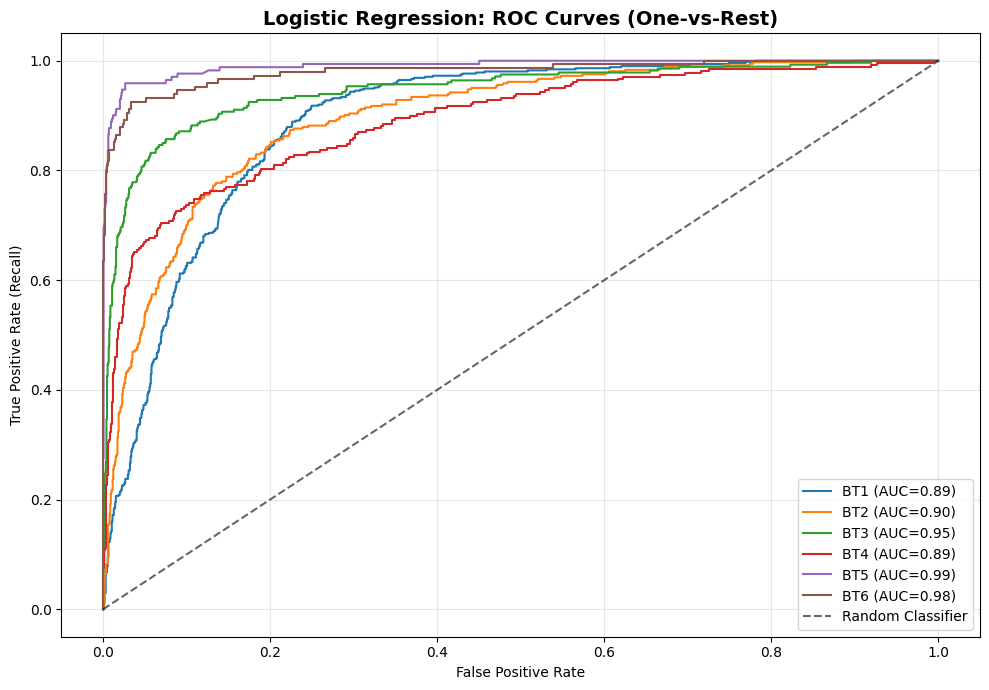

ROC curves plotted for Logistic Regression


In [48]:
# ROC Curves show the trade-off between true positives and false positives
# Higher AUC (Area Under Curve) = better performance
# We plot one curve for each Bloom's level (one-vs-rest approach)

plt.figure(figsize=(10, 7))

for i, c in enumerate(classes):
    # Calculate false positive rate and true positive rate for this class
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], log_reg_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{c} (AUC={roc_auc:.2f})")

# Add diagonal reference line (random classifier)
plt.plot([0, 1], [0, 1], "k--", alpha=0.6, label="Random Classifier")

plt.title("Logistic Regression: ROC Curves (One-vs-Rest)", fontsize=14, fontweight="bold")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("ROC curves plotted for Logistic Regression")

### **Step 13.4: Logistic Regression - Precision-Recall Curves**
 Shows the precision-recall trade-off for each class. Curves closer to the top-right corner indicate better performance.

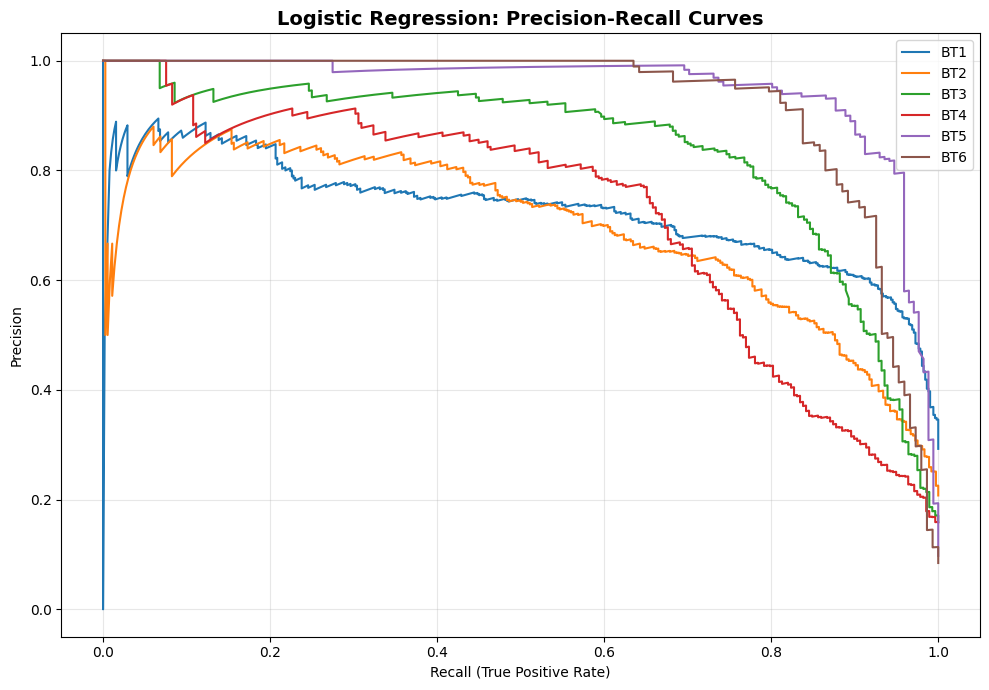

Precision-Recall curves plotted for Logistic Regression


In [49]:
# Precision-Recall curves are especially useful for imbalanced datasets
# Shows the trade-off between precision (accuracy of positive predictions)
# and recall (how many positives we actually caught)

plt.figure(figsize=(10, 7))

for i, c in enumerate(classes):
    # Calculate precision and recall for this class
    prec, rec, _ = precision_recall_curve(y_test_bin[:, i], log_reg_probs[:, i])
    plt.plot(rec, prec, label=f"{c}")

plt.title("Logistic Regression: Precision-Recall Curves", fontsize=14, fontweight="bold")
plt.xlabel("Recall (True Positive Rate)")
plt.ylabel("Precision")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("Precision-Recall curves plotted for Logistic Regression")

### **Step 13.5: Logistic Regression - Confusion Matrix Heatmap**
Creates a visual confusion matrix showing where the model makes mistakes. Look for patterns - does it confuse adjacent Bloom's levels?

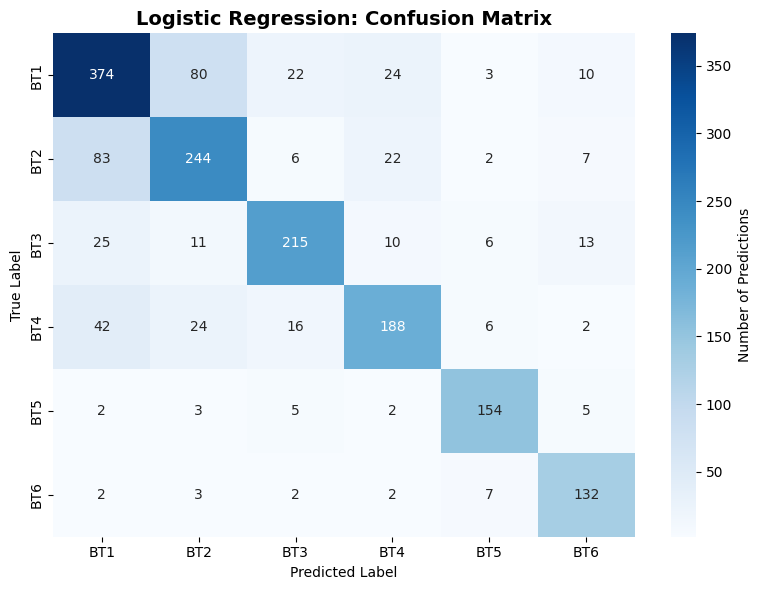

Confusion matrix heatmap created for Logistic Regression


In [51]:
# Visualize the confusion matrix as a heatmap for easier interpretation
# Diagonal cells = correct predictions (darker is better)
# Off-diagonal cells = mistakes (which classes get confused with each other)

plt.figure(figsize=(8, 6))

sns.heatmap(
    log_reg_confusion_matrix,
    annot=True,  # show numbers in cells
    fmt="d",  # format as integers
    cmap="Blues",
    xticklabels=classes,
    yticklabels=classes,
    cbar_kws={'label': 'Number of Predictions'}
)

plt.title("Logistic Regression: Confusion Matrix", fontsize=14, fontweight="bold")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

print("Confusion matrix heatmap created for Logistic Regression")

## **Step 13.6: DistilBERT - Prepare Probabilities**
Converts DistilBERT's raw predictions (logits) into probabilities and prepares labels for plotting.

In [54]:
# Get prediction probabilities from DistilBERT
# Convert logits to probabilities using softmax
distilbert_probs = torch.softmax(torch.tensor(predictions.predictions), dim=-1).numpy()

# Binarize test labels for DistilBERT evaluation
test_bin = label_binarize(test_labels, classes=range(len(classes)))

print("DistilBERT probabilities prepared!")
print(f"Shape: {distilbert_probs.shape}")

DistilBERT probabilities prepared!
Shape: (1754, 6)


## **Step 13.7: DistilBERT - ROC Curves**
Creates ROC curves for DistilBERT. Compare AUC scores with Logistic Regression to see which model performs better per class.

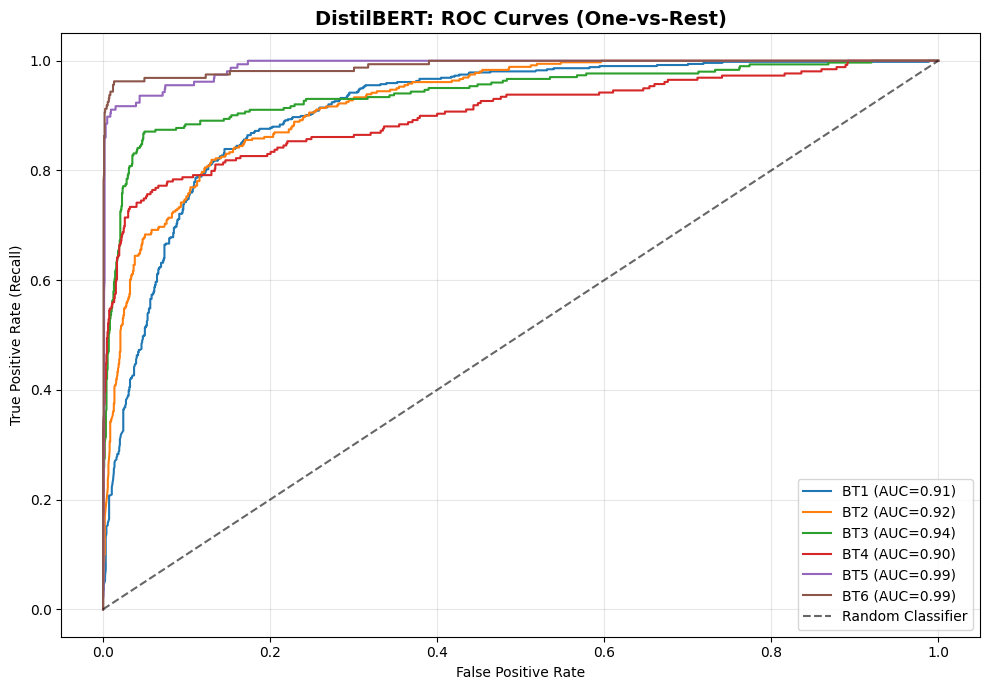

ROC curves plotted for DistilBERT


In [56]:
# ROC Curves for DistilBERT - same interpretation as before
# Compare these AUC values with Logistic Regression to see improvement

plt.figure(figsize=(10, 7))

for i, c in enumerate(classes):
    fpr, tpr, _ = roc_curve(test_bin[:, i], distilbert_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{c} (AUC={roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", alpha=0.6, label="Random Classifier")

plt.title("DistilBERT: ROC Curves (One-vs-Rest)", fontsize=14, fontweight="bold")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("ROC curves plotted for DistilBERT")

## **Step 13.8: DistilBERT - Precision-Recall Curves**
Shows precision-recall trade-offs for DistilBERT. Compare with Logistic Regression curves to see performance differences.

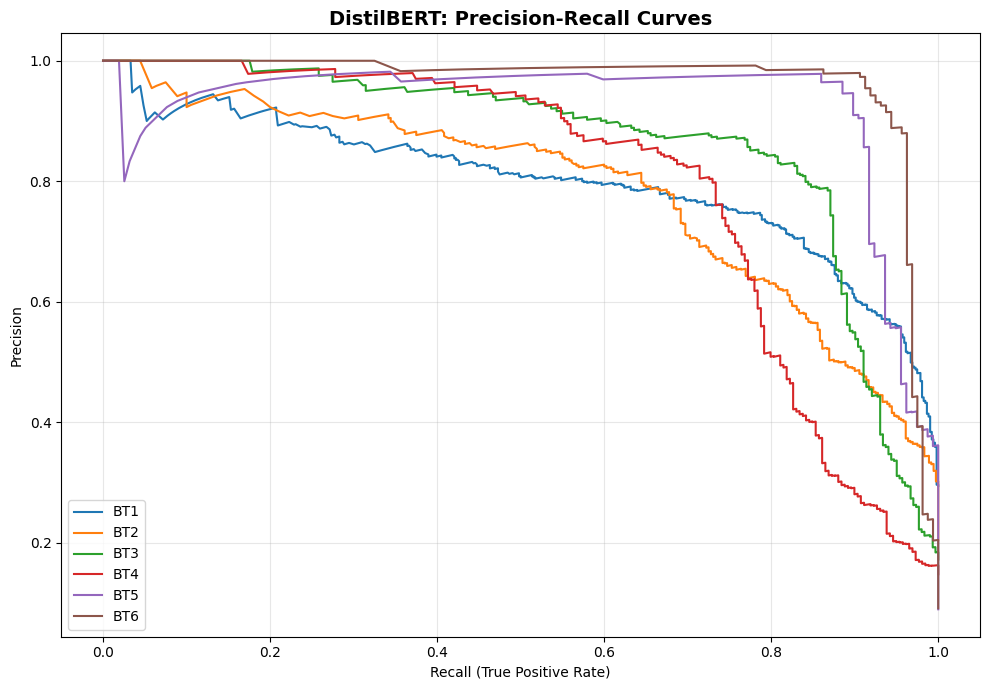

Precision-Recall curves plotted for DistilBERT


In [58]:
# Precision-Recall curves for DistilBERT
# Higher curves = better balance between precision and recall

plt.figure(figsize=(10, 7))

for i, c in enumerate(classes):
    prec, rec, _ = precision_recall_curve(test_bin[:, i], distilbert_probs[:, i])
    plt.plot(rec, prec, label=f"{c}")

plt.title("DistilBERT: Precision-Recall Curves", fontsize=14, fontweight="bold")
plt.xlabel("Recall (True Positive Rate)")
plt.ylabel("Precision")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("Precision-Recall curves plotted for DistilBERT")

### **Step 13.9: DistilBERT - Confusion Matrix Heatmap**
Creates a visual confusion matrix for DistilBERT. Compare with Logistic Regression to see if DistilBERT makes different types of mistakes.

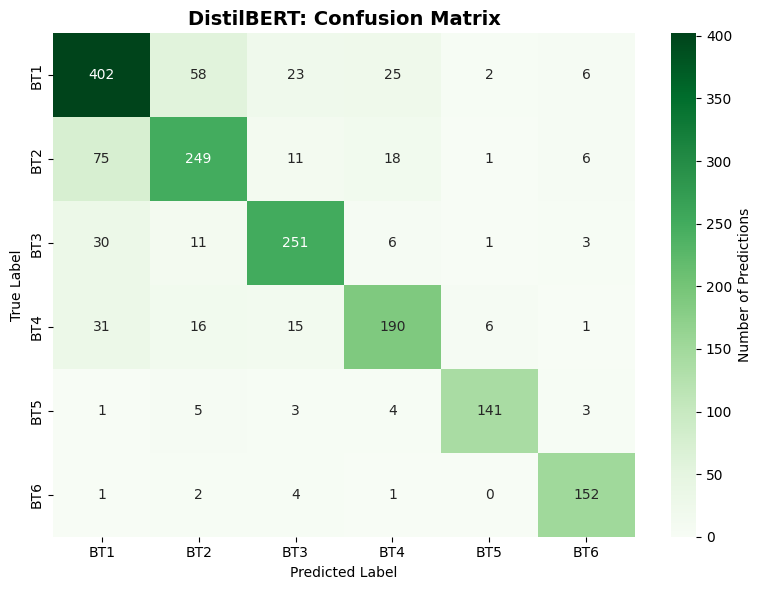

Confusion matrix heatmap created for DistilBERT


In [60]:
# Visualize DistilBERT's confusion matrix
# Green color scheme to distinguish from Logistic Regression (blue)

distilbert_cm = confusion_matrix(test_labels, y_pred_distilbert)

plt.figure(figsize=(8, 6))

sns.heatmap(
    distilbert_cm,
    annot=True,
    fmt="d",
    cmap="Greens",
    xticklabels=classes,
    yticklabels=classes,
    cbar_kws={'label': 'Number of Predictions'}
)

plt.title("DistilBERT: Confusion Matrix", fontsize=14, fontweight="bold")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

print("Confusion matrix heatmap created for DistilBERT")

### **Step 13.10: Feature Importance - Top Words per Class**
Shows which words are most strongly associated with each Bloom's level. This helps explain Why the model makes its predictions.

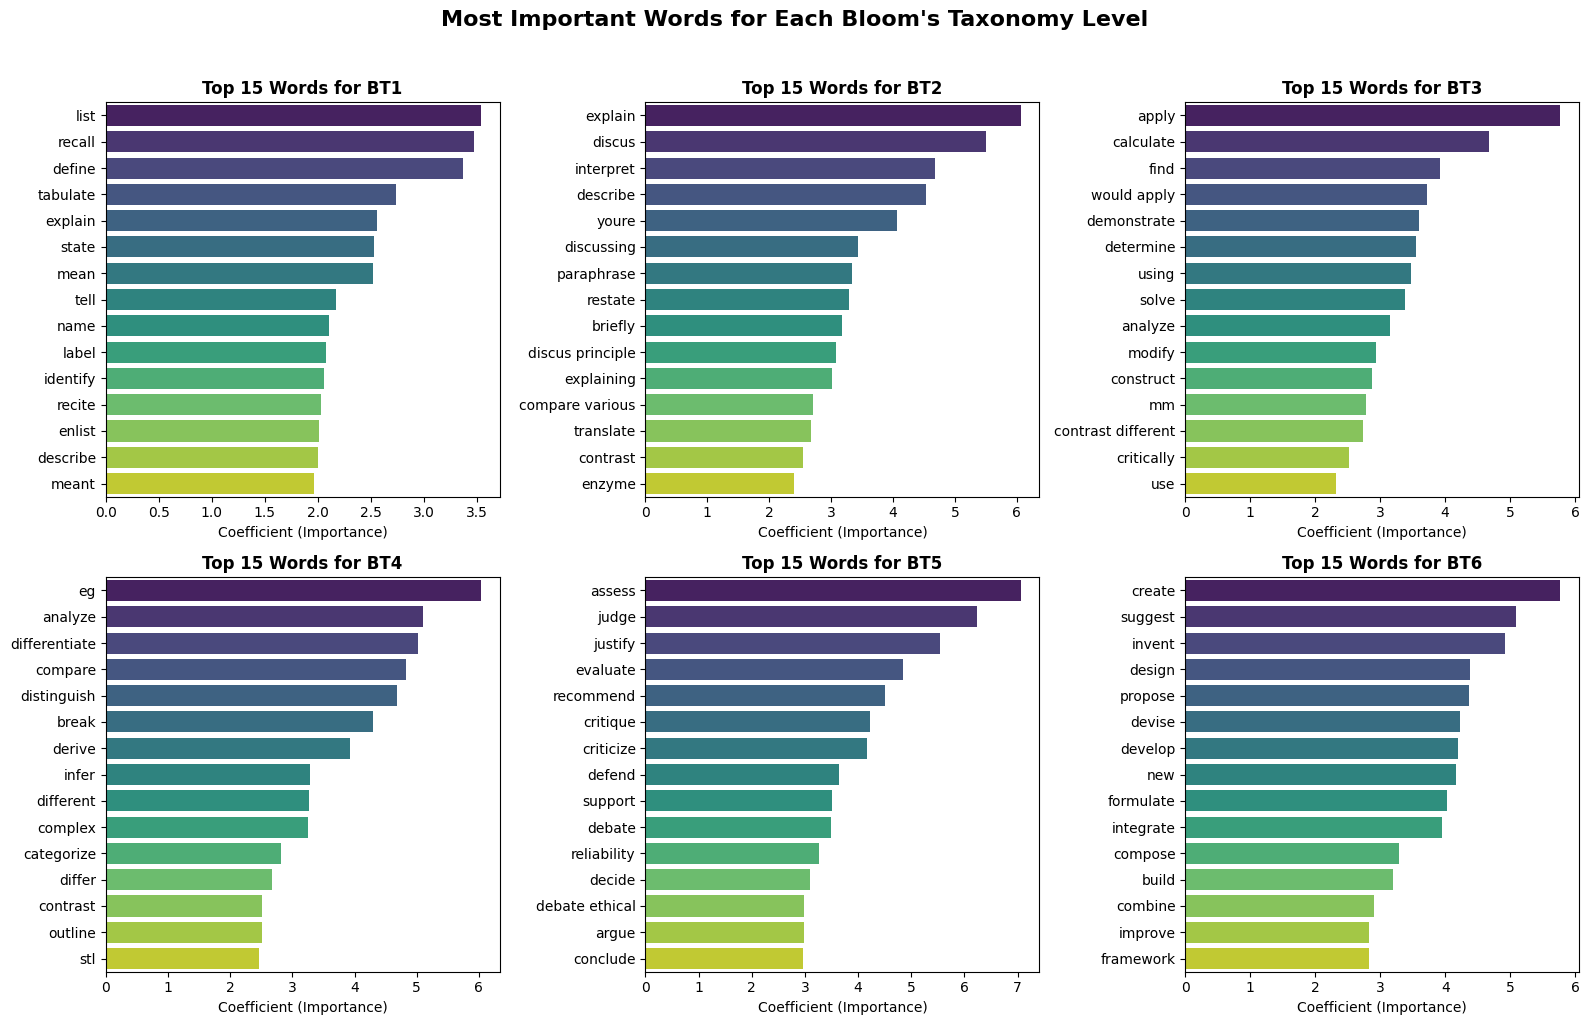

Feature importance visualized for all classes


In [61]:
# Visualize which words are most important for each Bloom's level
# Logistic Regression coefficients tell us which words push toward each class
# Positive coefficient = word strongly indicates this class

feature_names = tfidf_vectorizer.get_feature_names_out()
coefs = logistic_reg_model.coef_
top_k = 15  # show top 15 words per class

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, c in enumerate(classes):
    # Get indices of top positive coefficients for this class
    top_pos = np.argsort(coefs[idx])[-top_k:][::-1]

    # Create bar plot
    sns.barplot(
        x=coefs[idx][top_pos],
        y=feature_names[top_pos],
        ax=axes[idx],
        palette="viridis"
    )
    axes[idx].set_title(f"Top {top_k} Words for {c}", fontweight="bold")
    axes[idx].set_xlabel("Coefficient (Importance)")
    axes[idx].set_ylabel("")

plt.suptitle("Most Important Words for Each Bloom's Taxonomy Level",
             fontsize=16, fontweight="bold", y=1.02)
plt.tight_layout()
plt.show()

print("Feature importance visualized for all classes")

## **Step 13.11: Word Cloud - Overall Vocabulary**
Creates a visual word cloud showing the most frequent words across all processed questions. Gives you a quick sense of the vocabulary.

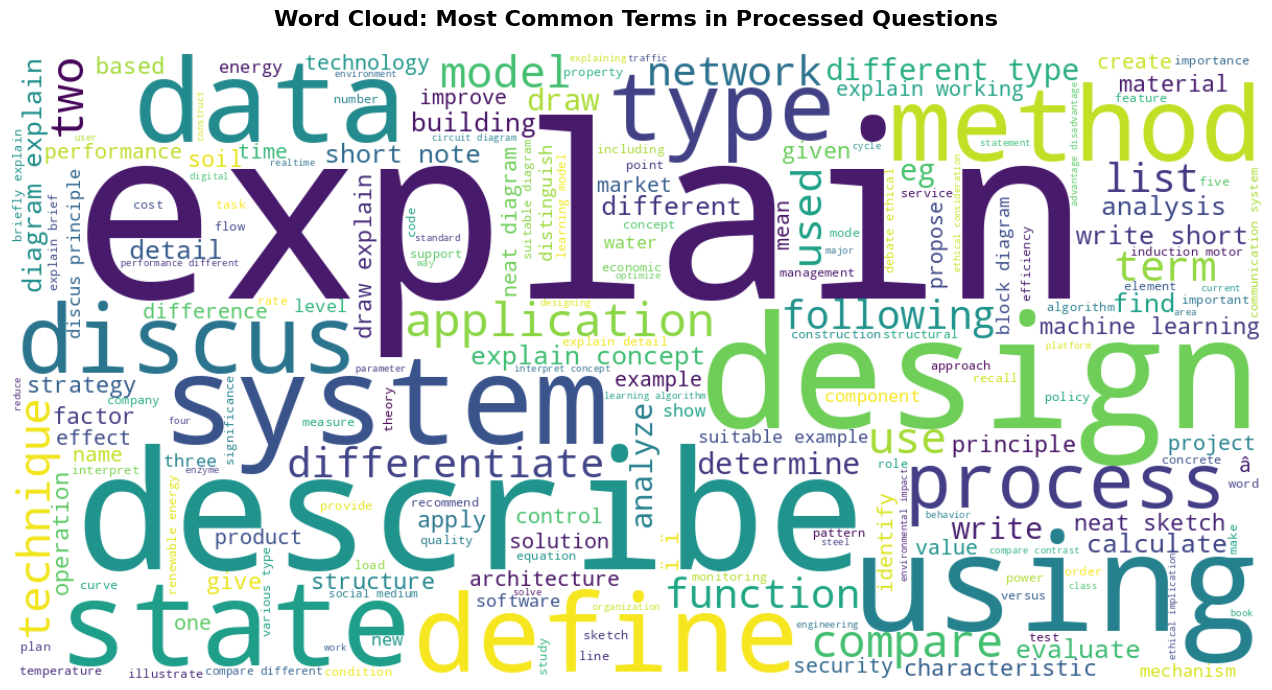

Word cloud generated successfully!
Total unique words: 72814


In [63]:
# Create a word cloud to visualize the most common words across all questions
# Bigger words = appear more frequently in the dataset

all_text = " ".join(df["Processed_Questions"])

wc = WordCloud(
    width=1200,
    height=600,
    background_color="white",
    max_words=200,
    colormap="viridis",
    relative_scaling=0.5
).generate(all_text)

plt.figure(figsize=(14, 7))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud: Most Common Terms in Processed Questions",
          fontsize=16, fontweight="bold", pad=20)
plt.tight_layout()
plt.show()

print("Word cloud generated successfully!")
print(f"Total unique words: {len(all_text.split())}")